In [1]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import math
from scipy.stats import multivariate_normal as mvn

In [2]:
df = pd.read_csv('data_proj_414.csv',index_col=0)

print(df)

               X          Y  Potter  Weasley  Granger  Trip  Close  Far
1       2.466284   3.582118       1        0        0     1      0    0
2       5.508336   8.295713       1        0        0     1      0    0
3       6.784481  11.851393       1        0        0     1      0    0
4       7.550499  14.411812       1        0        0     1      0    0
5      10.402096  17.218079       1        0        0     1      0    7
...          ...        ...     ...      ...      ...   ...    ...  ...
24090  40.615083  74.485727       0        0        1    49      4   16
24091  41.485127  74.335721       0        0        1    49      1    8
24092  41.275887  76.995216       0        0        1    49      1    2
24093  42.176981  76.159014       0        0        1    49      0    1
24094  40.530502  76.063805       0        0        1    49      1    8

[24094 rows x 8 columns]


Collect "Close" data with resolution factor: 

In [10]:
resolution_factor=1
map_close = np.zeros((107*resolution_factor, 107*resolution_factor))
X_close = []
Y_close = []
close = []
min_resolution_x=[]
min_resolution_y=[]
one_grid_count=np.zeros((107*resolution_factor, 107*resolution_factor))
max_one_grid_count_=0
for i in range(1, len(df['X'])+ 1):
  if i<len(df['X']):
    min_resolution_x.append(abs(df['X'][i]- df['X'][i+1])) #min(min_resolution_x,abs(df['X'][i]- df['X'][i+1]))
    min_resolution_y.append(abs(df['Y'][i]- df['Y'][i+1]))#min(min_resolution_y,abs(df['Y'][i]- df['Y'][i+1]))
  x =int(round(df['X'][i],1 )*resolution_factor)  #math.floor(df['X'][i])
  y =int(round(df['Y'][i],1 )*resolution_factor) #math.floor(df['Y'][i])
  one_grid_count[x][y]+=1
  max_one_grid_count_=max(max_one_grid_count_,one_grid_count[x][y])
  map_close[x][y] = map_close[x][y] + df['Close'][i]

for i in range(107*resolution_factor): 
  for j in range(107*resolution_factor): 
    if (one_grid_count[i][j] == 0): 
      map_close[i][j] = None
    else: 
      map_close[i][j] = map_close[i][j] / one_grid_count[i][j]


for i in range(0,107*resolution_factor):
  for j in range(0,107*resolution_factor):
    X_close.append(i)
    Y_close.append(j)
    close.append(map_close[i][j])

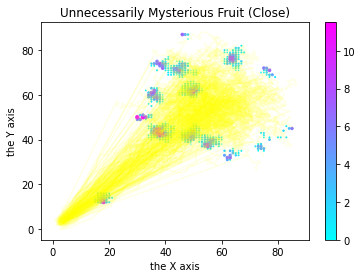

In [6]:
ntrip = 49

#fig=plt.figure()
#fig.show()
#ax=fig.add_subplot(111)
cmap = plt.cm.get_cmap('spring')
for i in range(1, ntrip+1): 
    rs_df = df.loc[df['Trip'] == i]
    c = cmap(100/ntrip)
    plt.plot(rs_df['X'], rs_df['Y'], color = c, alpha = 0.1)


# Change color with c and transparency with alpha. 
# I map the color to the X axis value.
close_plt = plt.scatter(X_close, Y_close, s = close, c = close, cmap="cool", alpha=1, linewidth=1)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.colorbar(close_plt)
plt.title("Unnecessarily Mysterious Fruit (Close)")

# Show the graph
plt.show()

Use "Far" data to estimate the untouched grid points. 

In [ ]:
def estimate_from_far(map, i, j): 
  


In [8]:
resolution_factor=1
map_far = np.zeros((107*resolution_factor, 107*resolution_factor))
X_far = []
Y_far = []
far = []
min_resolution_x=[]
min_resolution_y=[]
one_grid_count_far=np.zeros((107*resolution_factor, 107*resolution_factor))
max_one_grid_count_far=0
for i in range(1, len(df['X'])+ 1):
  if i<len(df['X']):
    min_resolution_x.append(abs(df['X'][i]- df['X'][i+1])) #min(min_resolution_x,abs(df['X'][i]- df['X'][i+1]))
    min_resolution_y.append(abs(df['Y'][i]- df['Y'][i+1]))#min(min_resolution_y,abs(df['Y'][i]- df['Y'][i+1]))
  x =int(round(df['X'][i],1 )*resolution_factor)  #math.floor(df['X'][i])
  y =int(round(df['Y'][i],1 )*resolution_factor) #math.floor(df['Y'][i])
  one_grid_count_far[x][y]+=1
  max_one_grid_count_far=max(max_one_grid_count_far,one_grid_count_far[x][y])
  map_far[x][y] = map_far[x][y] + df['Far'][i]

for i in range(107*resolution_factor): 
  for j in range(107*resolution_factor): 
    if (one_grid_count_far[i][j] == 0): 
      map_far[i][j] = estimate_from_far(map_far, i, j)
    else: 
      map_far[i][j] = map_far[i][j] / one_grid_count_far[i][j]



for i in range(0,107*resolution_factor):
  for j in range(0,107*resolution_factor):
    X_far.append(i)
    Y_far.append(j)
    far.append(map_far[i][j])


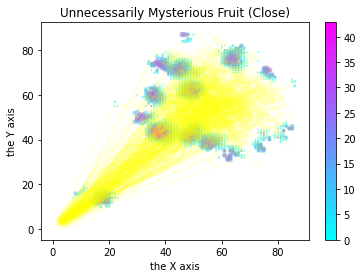

In [12]:
ntrip = 49

#fig=plt.figure()
#fig.show()
#ax=fig.add_subplot(111)
cmap = plt.cm.get_cmap('spring')
for i in range(1, ntrip+1): 
    rs_df = df.loc[df['Trip'] == i]
    c = cmap(100/ntrip)
    plt.plot(rs_df['X'], rs_df['Y'], color = c, alpha = 0.1)


# Change color with c and transparency with alpha. 
# I map the color to the X axis value.
plt.scatter(X_far, Y_far, s = far, c = far, cmap="cool", alpha=0.4, linewidth=1)
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.colorbar(close_plt)
plt.title("Unnecessarily Mysterious Fruit (Close)")

# Show the graph
plt.show()

Use the obtained close data to run a set of "Far" data.

In [ ]:
newdf = df[['X','Y','Trip','Close','Far']]
newfar = []
count = 0
#k = 0
for index, row in newdf.iterrows():
  #k = k + 1
  #if (k > 15): 
    #break
  x = math.floor(row['X'])
  y = math.floor(row['Y'])
  count = map_close[x][y]
  #print("x, y: ", (x, y))
  #print("surrounding: ")
  for i in range(-2, 3): 
    for j in range(-2, 3): 
      if (i, j) == (0, 0): 
        continue
      count = count + map_close[x+i][y+j]
      #print((x+i, x+j), ":",map_close[x+i][y+j])
  #print((x, y), ":", count, "map_close: ", map_close[x][y])
  newfar.append(count)
print(len(newfar))
newdf['newFar'] = newfar
print(newdf)
newdf.to_csv('414newdata.csv')

24094
               X          Y  Trip  Close  Far  newFar
1       2.466284   3.582118     1      0    0     0.0
2       5.508336   8.295713     1      0    0     0.0
3       6.784481  11.851393     1      0    0     0.0
4       7.550499  14.411812     1      0    0     0.0
5      10.402096  17.218079     1      0    7     0.0
...          ...        ...   ...    ...  ...     ...
24090  40.615083  74.485727    49      4   16    53.0
24091  41.485127  74.335721    49      1    8    46.0
24092  41.275887  76.995216    49      1    2    17.0
24093  42.176981  76.159014    49      0    1    10.0
24094  40.530502  76.063805    49      1    8    25.0

[24094 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in range(-2, 3): 
  for j in range(-2, 3): 
    if (i, j) == (0, 0): 
      continue
    print(i, j)

-2 -2
-2 -1
-2 0
-2 1
-2 2
-1 -2
-1 -1
-1 0
-1 1
-1 2
0 -2
0 -1
0 1
0 2
1 -2
1 -1
1 0
1 1
1 2
2 -2
2 -1
2 0
2 1
2 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


TypeError: ignored

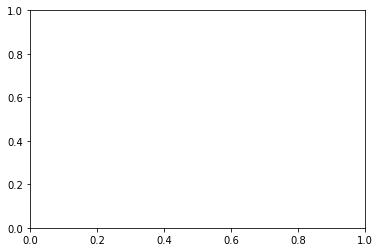

In [ ]:

# Change color with c and transparency with alpha. 
# I map the color to the X axis value.
close_plt = plt.figure()
close = close_plt.add_subplot(111)
path = close_plt.add_subplot(111)
.scatter(X_close, Y_close, s = close, c = close, cmap="cool", alpha=0.4, linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.colorbar(close_plt)
plt.title("Unnecessarily Mysterious Fruit (Close)")


ntrip = 49
cmap = plt.cm.get_cmap('pink')
for i in range(1, ntrip+1): 
    rs_df = df.loc[df['Trip'] == i]
    c = cmap(float(i)/ntrip)
    path.plot(rs_df['X'], rs_df['Y'], color = c, alpha = 0.5)

# Show the graph
plt.show()

Plot the "Far" data

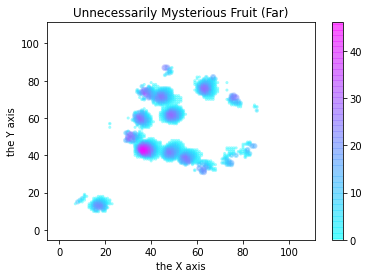

In [ ]:
map_far = np.zeros((107, 107))

for i in range(1, len(df['X'])+ 1): 
  x = math.floor(df['X'][i])
  y = math.floor(df['Y'][i])
  if (df['Far'][i] > map_far[x][y]): 
    map_far[x][y] = df['Far'][i]

X_far = []
Y_far = []
far = []
for i in range(107): 
  for j in range(107): 
    X_far.append(i)
    Y_far.append(j)
    far.append(map_far[i][j])

# Change color with c and transparency with alpha. 
# I map the color to the X axis value.
far_plt = plt.scatter(X_far, Y_far, s = far, c = far, cmap="cool", alpha=0.4, linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.colorbar(far_plt)
plt.title("Unnecessarily Mysterious Fruit (Far)")

# Show the graph
plt.show()